In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold, cross_val_score
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
# from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
import lmdiag

%matplotlib inline
plt.style.use('seaborn-white')

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('A_exam.csv')

# Problem 1

## 1

In [3]:
df.head()

,A,B,C,F,G,H,I,J,K,L,Response,D,E,M,N
0,-139.183051,-1.060948,-0.097275,-0.365750,0.404934,-0.305241,-1.404708,0.337155,-1.592293,-0.103458,-0.456757,Male,Yes,-0.205713,-138.988001
1,29.485760,0.505301,2.554449,-1.150606,-1.136165,1.057958,0.605221,1.175852,-0.746916,1.747668,1.396062,Fema,Yes,1.892266,29.152263
2,-58.997366,0.345515,0.975520,-1.028006,-1.021109,0.281955,0.845064,-0.204924,-0.737706,0.852126,1.612660,Fema,Yes,1.080193,-58.942485
3,-337.510287,-0.535584,0.276812,0.547569,-0.625828,0.779547,-0.193539,-1.696172,-1.226760,-0.876860,-0.498703,Fema,Yes,-1.143868,-337.379225
4,-170.224848,1.288707,-0.454460,-0.638863,-1.486823,-0.525961,0.147493,-0.923201,-0.929357,-1.304802,1.186234,Fema,Yes,-1.611586,-169.823726


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
A           1000 non-null float64
B           1000 non-null float64
C           1000 non-null float64
F           1000 non-null float64
G           1000 non-null float64
H           1000 non-null float64
I           1000 non-null float64
J           1000 non-null float64
K           1000 non-null float64
L           1000 non-null float64
Response    1000 non-null float64
D           1000 non-null object
E           1000 non-null object
M           1000 non-null float64
N           1000 non-null float64
dtypes: float64(13), object(2)
memory usage: 117.3+ KB


In [5]:
df.shape

(1000, 15)

There are 1000 obsevations and 15 features

In [6]:
df_categorical = ['D', 'E']

In [7]:
df_numerical = list(df.select_dtypes(exclude='object').columns.values)

In [8]:
df_numerical

['A', 'B', 'C', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'Response', 'M', 'N']

categorical vars are ['D', 'E'] , numericals are ['A', 'B', 'C', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'Response', 'M', 'N']

## 2

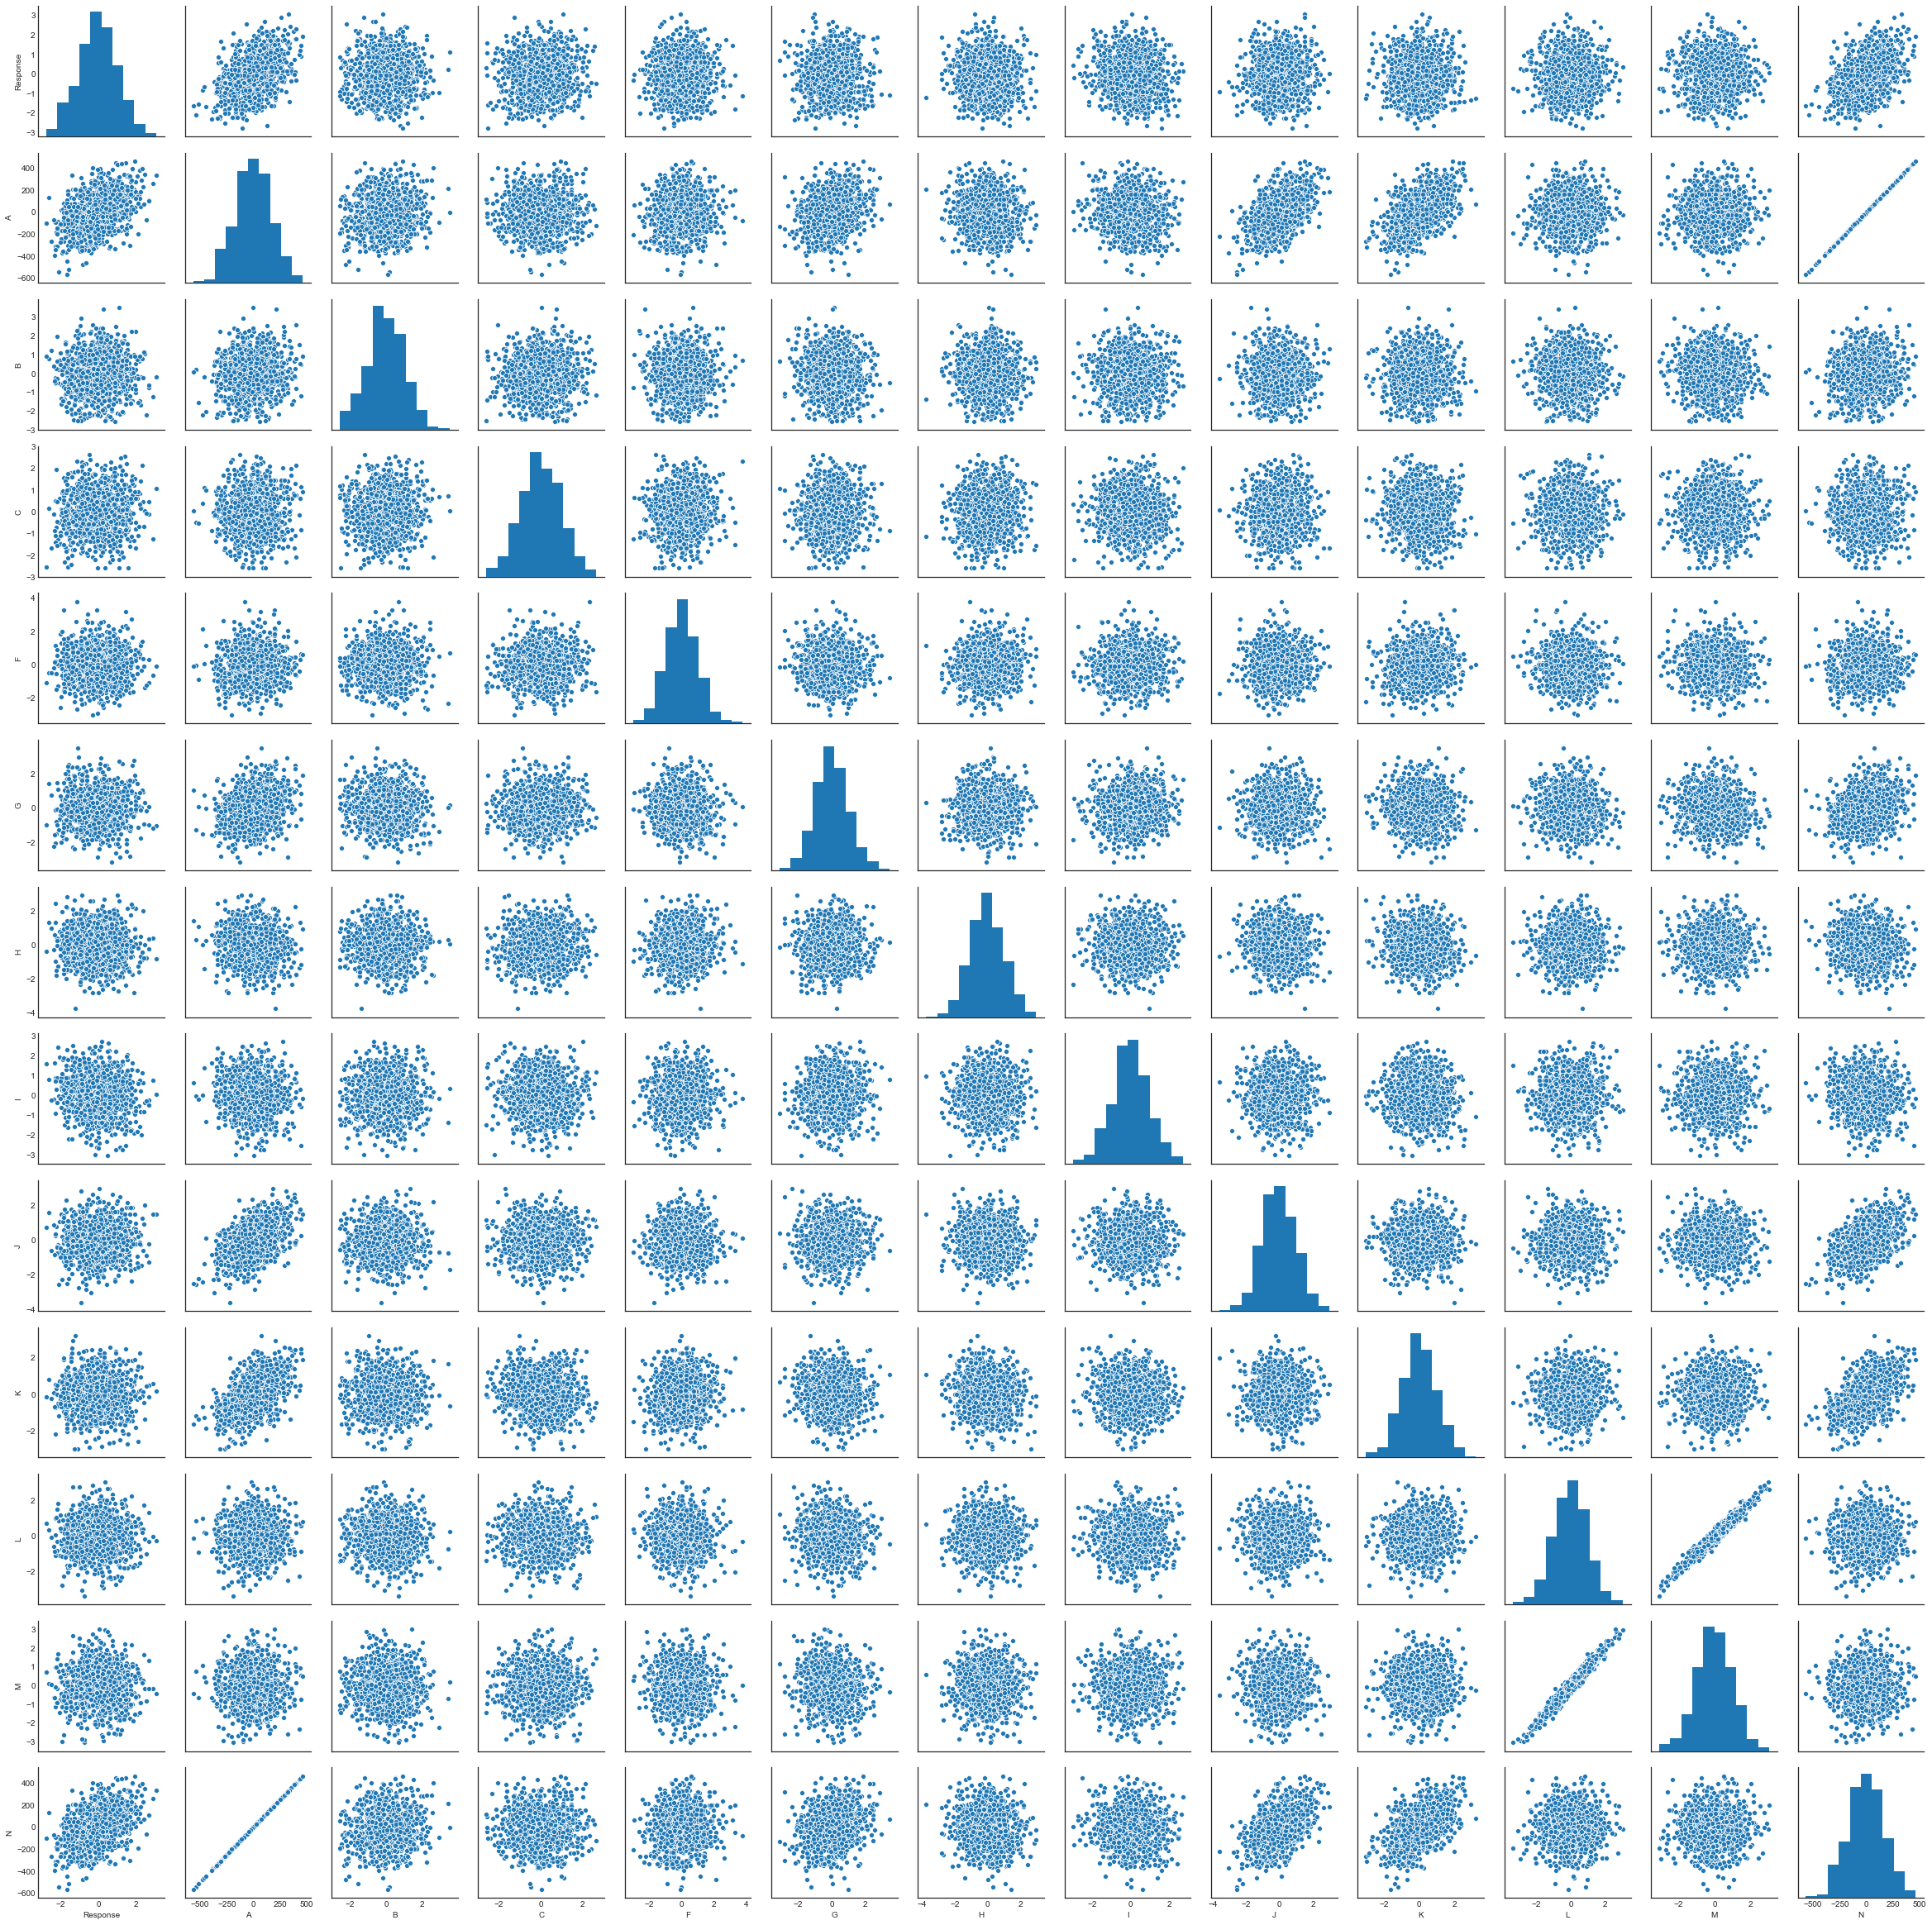

In [9]:
# plt.figure(figsize=(8,5))
sns.pairplot(df[['Response', 'A', 'B', 'C', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']]);

From the above graph we can say , that 'A' and 'N' featurea may be correlated with the response, the correlation with other ones seems to be 0 or (dran mot mi ban)

## 3

In [10]:
def boxplot_categorical(df, features ,response):
    for feature in features:
        if feature != response:
            sns.boxplot(feature,response, data=df, orient='v')
            plt.show()

In [11]:
df_categorical

['D', 'E']

In [12]:
df.D.unique()

array(['Male', 'Fema'], dtype=object)

In [13]:
df.E.unique()

array(['Yes', 'No'], dtype=object)

Both categorical variables have 2 levels

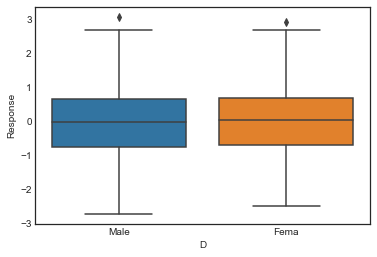

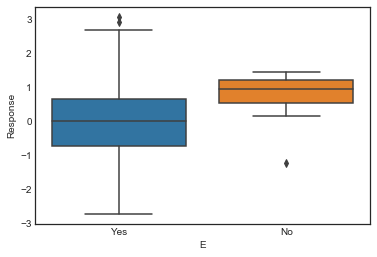

In [14]:
boxplot_categorical(df, df_categorical, 'Response')

vorpeszi response-i ev categorical variable-i mijev lini kaxvacutyun , anhrajesht e vor categorical variable-i levelneri mijev lini nkateli tarberutyun (response-ic kaxvac) , aysinqn median-nery tarber hartutyunneri vra linen:  
mer orinakum Response vs 'D' categorical variable boxplot-um mediannery hamarea nuyn gci vra en dasavorvac , hetevabar aystegh kaxvacutyun chka ,kam ete ka ayn shat tuyl e,   
Isk erkrord boxplot-um (response vs 'E') mediannery tarber hartutyunnerum en , aysinqn response-y 'E'-ic kaxvac e

# Problem 2

In [15]:
df.D = df.D.map({'Male':1, 'Fema':0})
df.E = df.E.map({'Yes':1, 'No':0})

In [16]:
df_full_regression = smf.ols(formula="Response ~ A + B + C + F + G + H + I + J + K + L + D + E + M + N", data=df).fit()

In [17]:
df_full_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     150.1
Date:                Sat, 20 Apr 2019   Prob (F-statistic):          9.91e-233
Time:                        11:25:33   Log-Likelihood:                -849.65
No. Observations:                1000   AIC:                             1729.
Df Residuals:                     985   BIC:                             1803.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6948      0.203      3.426      0.001       0.297       1.093
A              0.1043      0.045      2.308      0.021       0.016       0.193
B             -0.1612      0.018     -8.836      0.000      -0.197      -0.125
C              0.0223      0.019      1.167      0.243      -0.015       0.060
F              0.0060      0.019      0.325      0.746      -0.030       0.042
G             -0.4644      0.021    -21.955      0.000      -0.506      -0.423
H             -0.0058      0.018     -0.323      0.747      -0.041       0.029
I             -0.0291      0.019     -1.541      0.124      -0.066       0.008
J             -0.8121      0.027    -30.627      0.000      -0.864      -0.760
K             -0.9372      0.028    -33.643      0.000      -0.992      -0.883
L              0.0717      0.092      0.777      0.437      -0.109       0.253
D             -1.2665      0.045    -28.252      0.000      -1.354      -1.179
E             -0.1064      0.204     -0.523      0.601      -0.506       0.293
M             -0.0593      0.091     -0.655      0.513      -0.237       0.118
N             -0.0942      0.045     -2.085      0.037      -0.183      -0.006
==============================================================================
Omnibus:                        3.430   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                3.719
Skew:                          -0.052   Prob(JB):                        0.156
Kurtosis:                       3.280   Cond. No.                     3.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The important metrics are the following :  
B G J K D N 

In [18]:
df_partial_regression = smf.ols(formula="Response ~ B + G + J + K + D + N", data=df).fit()

In [19]:
df_partial_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     347.8
Date:                Sat, 20 Apr 2019   Prob (F-statistic):          5.09e-240
Time:                        11:25:33   Log-Likelihood:                -854.88
No. Observations:                1000   AIC:                             1724.
Df Residuals:                     993   BIC:                             1758.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5895      0.029     20.602      0.000       0.533       0.646
B             -0.1621      0.018     -8.904      0.000      -0.198      -0.126
G             -0.4670      0.021    -22.214      0.000      -0.508      -0.426
J             -0.8191      0.026    -30.989      0.000      -0.871      -0.767
K             -0.9417      0.028    -33.909      0.000      -0.996      -0.887
D             -1.2729      0.045    -28.459      0.000      -1.361      -1.185
N              0.0101      0.000     45.518      0.000       0.010       0.011
==============================================================================
Omnibus:                        3.146   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.207   Jarque-Bera (JB):                3.318
Skew:                          -0.057   Prob(JB):                        0.190
Kurtosis:                       3.259   Cond. No.                         509.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adjust R-squared is 0.676 and for previous model it also was 0.676 . Therefore we can say that second model fit the data the same way as the first model:  
menq ughaki voch petkakan feature-nery durs enq shprtel u dranci modely chi vatacel , daje nuynna mnacel 

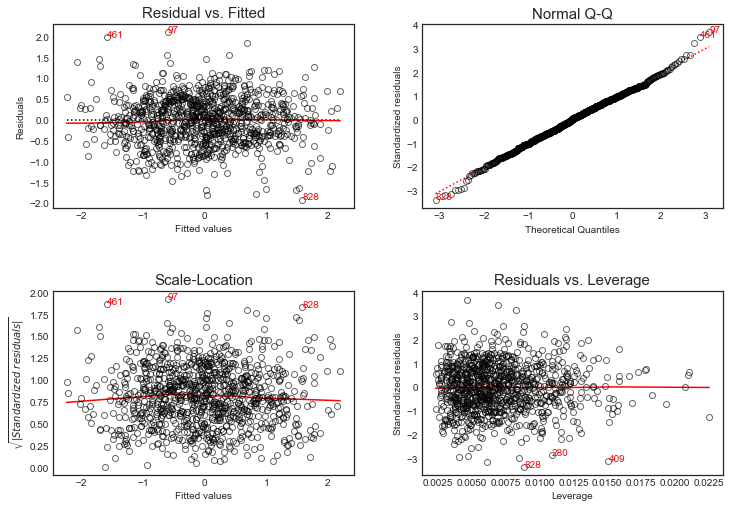

In [20]:
plt.figure(figsize=(10,7))
lmdiag.plot(df_partial_regression)
plt.show();

residual vs fitted:  
stegh amen inch normala , trend chi nkatvum , u dasavorvac en 0-i shurj
  
Q-Q:  
kareli e entadrel vor ka heavy tail distribution , qani vor cayramaserum ketery teqvac en ankyunayin gcic.
  
Scale Location:  
unenq mi qani hat outlier , nranq en voronc vra karmirov tiv a grvac (id-n) , qani vor 1.7-ic mec en 
  
Residuals vs Leverage:  
influential point chunenq, stegh chka nayev leverage points

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn import metrics

In [22]:
y = df.Response
X = df.drop(axis=1, columns=['Response'])

In [23]:
for j in np.arange(X.shape[1]):
    print("j -> ", X.columns[j], "       VIF->", variance_inflation_factor(X.values,j))

j ->  A        VIF-> 175457.27799132036
j ->  B        VIF-> 1.0549945334460697
j ->  C        VIF-> 1.0211765402276014
j ->  F        VIF-> 1.0349364386602862
j ->  G        VIF-> 1.350928822657508
j ->  H        VIF-> 1.0257047168637914
j ->  I        VIF-> 1.019348158517757
j ->  J        VIF-> 2.1568053620550076
j ->  K        VIF-> 2.3387532414520504
j ->  L        VIF-> 25.40565097037989
j ->  D        VIF-> 3.0817520055279153
j ->  E        VIF-> 2.527287805629833
j ->  M        VIF-> 25.389824450692632
j ->  N        VIF-> 175491.78566588706


In [24]:
X = X.drop(axis=1 , columns=['A'])

In [25]:
for j in np.arange(X.shape[1]):
    print("j -> ", X.columns[j], "       VIF->", variance_inflation_factor(X.values,j))

j ->  B        VIF-> 1.0548506234905795
j ->  C        VIF-> 1.021068562592717
j ->  F        VIF-> 1.027287257545231
j ->  G        VIF-> 1.3494150652740866
j ->  H        VIF-> 1.024904074937079
j ->  I        VIF-> 1.0191043352642541
j ->  J        VIF-> 2.151664626009061
j ->  K        VIF-> 2.3380530123240004
j ->  L        VIF-> 25.371496721426883
j ->  D        VIF-> 3.0817070614976627
j ->  E        VIF-> 2.5238953679210083
j ->  M        VIF-> 25.355480523208474
j ->  N        VIF-> 4.309079136739542


In [26]:
X = X.drop(axis=1 , columns=['L'])

In [27]:
for j in np.arange(X.shape[1]):
    print("j -> ", X.columns[j], "       VIF->", variance_inflation_factor(X.values,j))

j ->  B        VIF-> 1.054615953842607
j ->  C        VIF-> 1.018853678234679
j ->  F        VIF-> 1.0272864885584139
j ->  G        VIF-> 1.3494025787212254
j ->  H        VIF-> 1.0248916673268813
j ->  I        VIF-> 1.0183228148825492
j ->  J        VIF-> 2.1502116014688815
j ->  K        VIF-> 2.3380066578795002
j ->  D        VIF-> 3.0804836906262865
j ->  E        VIF-> 2.5227130099066173
j ->  M        VIF-> 1.0077484302595232
j ->  N        VIF-> 4.3075415894291105


In [28]:
df_final_model = smf.ols(formula="Response ~ B + C + F + G + H + I + J + K + D + E + M + N", data=df).fit()

In [29]:
df_final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     174.0
Date:                Sat, 20 Apr 2019   Prob (F-statistic):          1.01e-233
Time:                        11:25:40   Log-Likelihood:                -852.59
No. Observations:                1000   AIC:                             1731.
Df Residuals:                     987   BIC:                             1795.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6991      0.203      3.441      0.001       0.300       1.098
B             -0.1609      0.018     -8.804      0.000      -0.197      -0.125
C              0.0212      0.019      1.110      0.267      -0.016       0.059
F              0.0024      0.018      0.128      0.898      -0.034       0.039
G             -0.4628      0.021    -21.850      0.000      -0.504      -0.421
H             -0.0069      0.018     -0.386      0.700      -0.042       0.028
I             -0.0301      0.019     -1.593      0.111      -0.067       0.007
J             -0.8156      0.027    -30.746      0.000      -0.868      -0.764
K             -0.9382      0.028    -33.620      0.000      -0.993      -0.883
D             -1.2668      0.045    -28.210      0.000      -1.355      -1.179
E             -0.1135      0.204     -0.556      0.578      -0.514       0.287
M              0.0099      0.018      0.546      0.585      -0.026       0.045
N              0.0101      0.000     44.882      0.000       0.010       0.011
==============================================================================
Omnibus:                        3.453   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                3.765
Skew:                          -0.049   Prob(JB):                        0.152
Kurtosis:                       3.284   Cond. No.                     2.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adj. R-squared:	0.675 , isk nakhord model-um ayn havasar er 0.676 , aysinqn VIF-ic heto ayn miqich poqracela , bayc da en tarberutyuny chi  ,vor mnatcenq te modely vatacav , 

# Problem 3

## 1

In [30]:
y = df.Response
X = df.drop(axis=1, columns=['Response'])

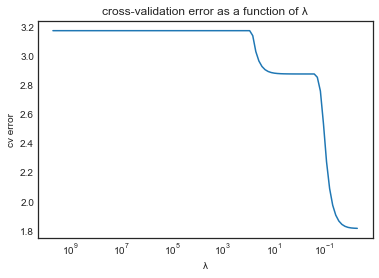

In [31]:
alphas = 10**np.linspace(10,-2,100)*0.5
# alphas = [0, 0.001, 0.01, 0.1, 1, 10]
lasso = Lasso()
cv_val = []

for a in alphas:
    lasso.set_params(alpha=a, random_state=42)
    errors = np.sum(-cross_val_score(lasso, 
                                 X, 
                                 y=y, 
                                 scoring='neg_mean_squared_error', 
                                 cv=10, 
                                 n_jobs=-1))
    cv_val.append(np.sqrt(errors))

ax = plt.gca()
ax.plot(alphas, cv_val)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('λ')
plt.ylabel('cv error')
plt.title('cross-validation error as a function of λ');

nkatum enq vor 0.1-ic heto lav ijnuma , hima miqich motecnenq tenanq nerqevum vonca poxvum 

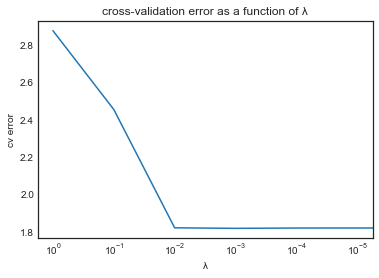

In [32]:
alphas = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
lasso = Lasso()
cv_val = []

for a in alphas:
    lasso.set_params(alpha=a, random_state=42)
    errors = np.sum(-cross_val_score(lasso, 
                                 X, 
                                 y=y, 
                                 scoring='neg_mean_squared_error', 
                                 cv=10, 
                                 n_jobs=-1))
    cv_val.append(np.sqrt(errors))

ax = plt.gca()
ax.plot(alphas, cv_val)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('λ')
plt.ylabel('cv error')
plt.title('cross-validation error as a function of λ');

ay verevinic arden lav erevuma vor lambda-i lav arjeqy 10^-2 -na 

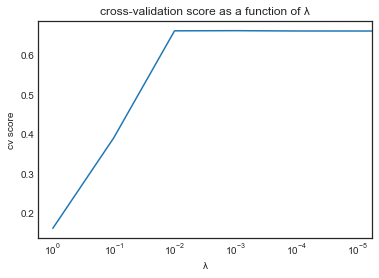

In [33]:
# alphas = 10**np.linspace(10,-2,100)*0.5
# alphas = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
lasso = Lasso()
cv_val = []

for a in alphas:
    lasso.set_params(alpha=a)
    cv_val.append(cross_val_score(lasso, X, y, cv=10).mean())

ax = plt.gca()
ax.plot(alphas, cv_val)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('λ')
plt.ylabel('cv score')
plt.title('cross-validation score as a function of λ');

et 10^-2 -um cv score-n ela max dzgtum 

In [50]:
lasso = Lasso(alpha=0.01).fit(scale(X), y)

In [51]:
lasso.coef_

array([ 0.51198515, -0.14127568,  0.01232892,  0.        , -0.41643473,
       -0.        , -0.02358389, -0.74295562, -0.85265887,  0.00327781,
       -0.58269174, -0.00316855,  0.        ,  1.05532524])

In [36]:
X.columns.values

array(['A', 'B', 'C', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'D', 'E', 'M',
       'N'], dtype=object)

Ev ayspes , lasso-n asuma vor mer model-ic karam durs shprtem  G, I, E , M feature-nery , isk orinak VIF-y asume er menak A-n u L-y  


## verjnakan tarberak

In [56]:
y = df.Response
X = df.drop(axis=1, columns=['Response'])

In [57]:
alphas = np.linspace(0.001,100,2500)
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, verbose = True)
lassocv.fit(scale(X),y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(alphas=array([1.00000e-03, 4.10156e-02, ..., 9.99600e+01, 1.00000e+02]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=100000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=True)

In [58]:
lassocv.alpha_

0.001

In [59]:
lasso_final = Lasso(alpha=0.001).fit(scale(X), y)

In [60]:
lasso_final.coef_

array([ 0.51887197, -0.16100732,  0.01960015,  0.00145897, -0.454499  ,
       -0.0058787 , -0.02840334, -0.80612431, -0.92137691,  0.01309823,
       -0.62841326, -0.009323  , -0.00184262,  1.15271031])

In [55]:
X.columns.values

array(['A', 'B', 'C', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'D', 'E', 'M',
       'N'], dtype=object)

bayc es verjnakan tarberaky voch mi feature chhanec